In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#Read the Data set and pre view the first columns
machineFailure = pd.read_csv('ai4i2020.csv')
machineFailure.head(5)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [2]:
#Take a look at the general information of the data set
#We don't have any null or NaN values
machineFailure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [3]:
# Drop columns that are not features or are not important for the training of the models
#UDI is just enumeration of observations
#Product ID can be dropped since it shouldn't determine wether the machine will fail or not
#TWF, HDF, PWF, OSF, RNF are the different types of machine failure, for the moment we won't need them since we are trying to
#predict machine failure

machineFailure.drop(columns={'Product ID', 'UDI', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'}, axis=1, inplace=True)
machineFailure.reset_index(inplace=True, drop=True)
machineFailure.head(5)

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
0,M,298.1,308.6,1551,42.8,0,0
1,L,298.2,308.7,1408,46.3,3,0
2,L,298.1,308.5,1498,49.4,5,0
3,L,298.2,308.6,1433,39.5,7,0
4,L,298.2,308.7,1408,40.0,9,0


In [4]:
machineFailure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     10000 non-null  object 
 1   Air temperature [K]      10000 non-null  float64
 2   Process temperature [K]  10000 non-null  float64
 3   Rotational speed [rpm]   10000 non-null  int64  
 4   Torque [Nm]              10000 non-null  float64
 5   Tool wear [min]          10000 non-null  int64  
 6   Machine failure          10000 non-null  int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 547.0+ KB


array([[<AxesSubplot:title={'center':'Air temperature [K]'}>,
        <AxesSubplot:title={'center':'Process temperature [K]'}>],
       [<AxesSubplot:title={'center':'Rotational speed [rpm]'}>,
        <AxesSubplot:title={'center':'Torque [Nm]'}>],
       [<AxesSubplot:title={'center':'Tool wear [min]'}>,
        <AxesSubplot:title={'center':'Machine failure'}>]], dtype=object)

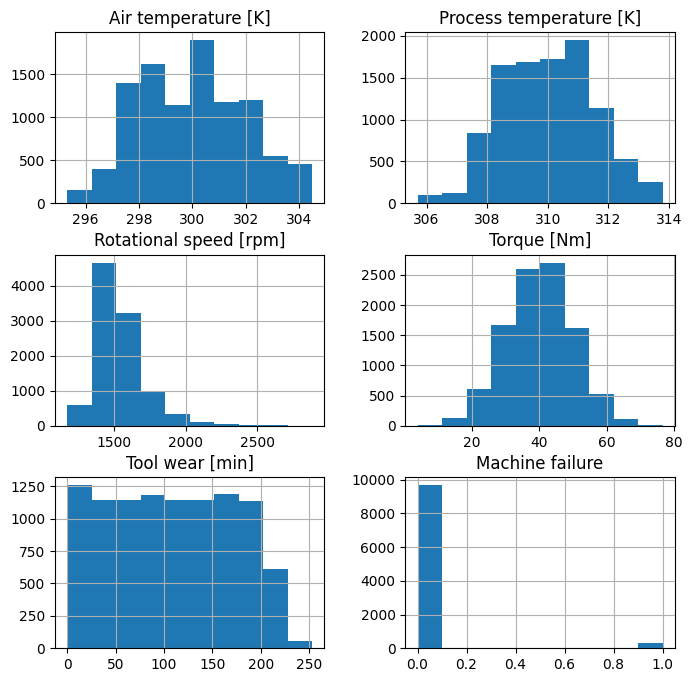

In [5]:
# Now let's just explore a little bit the distribution of the features in the data set
machineFailure[machineFailure.dtypes[(machineFailure.dtypes=='float64')|(machineFailure.dtypes=='int64')
                                    ].index.values].hist(figsize=[8,8])

#We can notice that most of our features have a distribution that resembles a gaussian one
#Also we realize the data set is heavily inbalanced

In [6]:
#Since the "Type" feature should have some kind of "prevalence" (meaning that low quality machines should be prone to 
#fail easier) we'll use label enconding for this, we are not using the LabelEncoder method from sklearn to control the 
#encoding and introduce an "expert" bias instead of a random one. 
def type_encoder(Qtype):
    if Qtype == 'L': #Low quality machines should fail with more ease
        return 1
    elif Qtype == 'M': #M Medium Quality
        return 0.5
    else:
        return 0 # H High Quality
    
machineFailure['e_type'] = machineFailure['Type'].apply(lambda row: type_encoder(row))

#We can drop the Type column now
machineFailure.drop(columns={'Type'}, inplace=True, axis=1)
machineFailure = machineFailure[['e_type'] + [col for col in machineFailure.columns if col != 'e_type']]
machineFailure.head(5)

,e_type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
0,0.5,298.1,308.6,1551,42.8,0,0
1,1.0,298.2,308.7,1408,46.3,3,0
2,1.0,298.1,308.5,1498,49.4,5,0
3,1.0,298.2,308.6,1433,39.5,7,0
4,1.0,298.2,308.7,1408,40.0,9,0


In [7]:
# Now let's separate our X & y data
X = np.array(machineFailure.drop(columns={'Machine failure'}, axis=1))
y = np.array(machineFailure['Machine failure'])

# Also let's split the data into train/test sets to standardize it
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=18, test_size=0.2)

#Standardize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [8]:
#Visualize the transformed data
pd.DataFrame(X_train, columns=list(machineFailure.columns)[:-1])

,e_type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,-0.752393,-1.304940,-1.289696,0.431791,-0.866159,0.545344
1,-0.752393,-1.254837,-0.885294,0.024705,-0.184598,0.232827
2,-0.752393,2.152169,2.282519,-0.327369,0.396734,-1.048492
3,0.744162,-1.204734,-0.480893,0.376780,-0.485286,-1.595397
4,0.744162,0.799388,0.664912,-0.310866,0.025884,0.529718
...,...,...,...,...,...,...
7995,-0.752393,-0.252776,-0.885294,-1.213057,1.208593,0.092194
7996,0.744162,1.951757,2.282519,-0.547416,0.867812,1.029745
7997,0.744162,-0.854012,-1.491897,2.005124,-1.778248,-0.064064
7998,-0.752393,0.248254,-0.346092,-1.218558,1.008134,-0.767227


In [9]:
pd.DataFrame(X_test, columns=list(machineFailure.columns)[:-1])

,e_type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,-0.713492,-1.193068,-1.061130,0.244332,-0.228757,-0.230625
1,0.750081,1.186524,1.231237,1.182335,-1.419176,1.697210
2,0.750081,-1.341792,-1.128553,3.919166,-2.377565,-1.210608
3,0.750081,0.641201,0.759279,-0.438392,-0.026991,1.343774
4,0.750081,1.136949,0.826702,-0.842089,1.304664,-0.776845
...,...,...,...,...,...,...
1995,0.750081,-0.350296,-0.589172,0.630219,-0.380082,-0.728650
1996,0.750081,-0.746894,-0.252059,-0.646177,0.094068,-0.037842
1997,-2.177064,0.294177,-0.184637,-0.343404,0.326099,-1.435523
1998,0.750081,0.393327,-0.184637,-0.396835,0.376541,0.813619
